# Modelos de média móvel para previsão de séries temporais

Um processo é modelável por uma **média móvel** se o seu valor em um dado instante de tempo for dependente da sua **média** até aquele instante e dos **resíduos de previsão** (tanto o atual quanto os anteriores). Essa definição é expressa matematicamente como $$y_t = \mu + {\epsilon}_t + \theta_{t-1} {\epsilon}_{t-1} + \theta_{t-2} {\epsilon}_{t-2} + ... + \theta_{t-q} {\epsilon}_{t-q},$$ em que $y_t$ é o valor da série temporal no instante $t$, $\mu$ é a média da série até o instante $t$, $\epsilon_i$ é o erro de previsão do modelo no instante $i$, $\theta_i$ é o peso associado ao erro no instante $i$ e $q$ é a ordem do modelo.

Essa definição pode parecer confusa inicialmente, uma vez que a previsão do modelo depende do seu próprio erro... mesmo que ainda não haja uma previsão para calcular esse erro (diz-se que os erros **não são observados** no dataset). Isso ocorre porque o erro do modelo é **estimado** estatisticamente, não sendo necessário conhecer a previsão no instante atual para conhecer, aproximadamente, o seu erro. Uma explicação mais detalhada da estimação dos erros pode ser encontrada em https://stats.stackexchange.com/questions/26024/moving-average-model-error-terms.

### Garantindo a estacionariedade dos dados

Os modelos de média móvel são parte dos modelos SARIMAX, ARIMA, ARIMAX, ARMA etc., que incluem fatores autoregressivos, sazonais e/ou variáveis externas na previsão. Todos esses modelos são caracterizados por modelarem processos com **autocorrelação relevante fora do lag 0**. Ou seja, esses modelos prevêem séries temporais que **não** são completamente aleatórias, como seria o caso do _random walk_. No caso específico do modelo MA, ele assume **estacionariedade** dos dados, significando que, caso a série original não seja estacionária, as previsões deverão ser feitas em cima dos dados transformados (série de diferenças ou logaritmo) e, ao fim do processo, a transformação inversa deverá ser feita para obter a previsão no espaço dos dados originais.

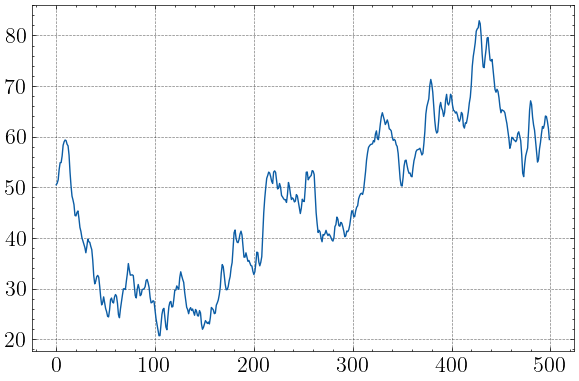

In [22]:
# Bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['grid', 'notebook', 'science'])
plt.rcParams['figure.figsize'] = [7, 4.5]

# Dados são uma série temporal fictícea
data = pd.read_csv('https://raw.githubusercontent.com/marcopeix/TimeSeriesForecastingInPython/master/data/widget_sales.csv')

# Plot dos dados
fig, ax = plt.subplots(1,1)
ax.plot(data.values)
plt.show()

A partir do gráfico da série temporal, é possível inferir que os dados não são estacionários, uma vez que suas propriedades estatísticas - em especial, a média - mudam ao longo do tempo.

Para estabilizar a média, tornando a série estacionária, vou obter a série de diferenças dos dados.

In [18]:
# Série de diferenças dos dados
diff_data = data.diff().dropna()



### Definição da ordem do modelo

A função de autocorrelação é muito importante na montagem de modelos MA, uma vez que ela nos diz a **ordem** $q$ do modelo, ou seja, quantos termos de erro anteriores impactam no valor atual da série. Por exemplo, se tivermos um modelo MA(1), apenas o erro atual e o erro em $t-1$ deverão ser considerados para a previsão, pois os termos anteriores não têm influência suficiente na saída atual do modelo. Para identificar $q$, plota-se a função de autocorrelação e observa até qual lag a correlação se mantém relevante; o máximo lag será o valor de $q$. Vale ressaltar que pode haver correlações aparentemente relevantes esporádicas na função de autocorrelação, isto é, altas correlações rodeadas por correlações muito baixas. Essas correlações podem ser desconsideradas, pois geralmente surgem ao acaso e não representam uma propriedade real do processo.